In [ ]:
import tensorflow as tf

# Create a sample tensor with NaN values
tensor = tf.constant([[1.0, float('nan'), 3.0],
                      [float('nan'), 5.0, 6.0]])

# Define the value you want to replace NaNs with
fill_value = 0.0

# Use tf.where to replace NaNs with the specified fill_value
filled_tensor = tf.where(tf.math.is_nan(tensor), fill_value, tensor)

print("Original Tensor:\n", tensor.numpy())
print("Tensor with NaNs filled:\n", filled_tensor.numpy())


In [5]:
import numpy as np

0.0001 * np.random.random()

7.500714457326919e-05

In [1]:
import pandas as pd

df = pd.read_csv('data/child-mind-institute-problematic-internet-use/train.csv')
df.shape

(3960, 82)

In [4]:
n_folds = 10
delta = 1 / n_folds
for i in range(n_folds):
    print(i * delta, (i + 1) * delta)

0.0 0.1
0.1 0.2
0.2 0.30000000000000004
0.30000000000000004 0.4
0.4 0.5
0.5 0.6000000000000001
0.6000000000000001 0.7000000000000001
0.7000000000000001 0.8
0.8 0.9
0.9 1.0


In [2]:
import numpy as np

np.mean([-0.005, 0.252, 0.265, 0.101, 0.345, 0.222, 0.368, 0.217, 0.015, 0.276])

0.2056

In [13]:
import numpy as np

x = np.random.random((3, 3))
x[0, 0] = 0
x[x == 0] = 1
x

array([[1.        , 0.21647918, 0.27638113],
       [0.30604167, 0.90116868, 0.68067177],
       [0.48317543, 0.71754194, 0.46064133]])

In [6]:
import pathlib
import pandas as pd

path_train_series = pathlib.Path('data/child-mind-institute-problematic-internet-use/series_train.parquet')
dims = []
for path in path_train_series.rglob('*.parquet'):
    dims.append(pd.read_parquet(path).shape)

In [7]:
dims_0 = [x[0] for x in dims]
dims_1 = [x[1] for x in dims]

In [14]:
import numpy as np

np.unique(dims_1)

array([13])

(array([105.,  63.,  53.,  87., 156., 520.,   2.,   7.,   1.,   2.]),
 array([   927. ,  76455.5, 151984. , 227512.5, 303041. , 378569.5,
        454098. , 529626.5, 605155. , 680683.5, 756212. ]),
 <BarContainer object of 10 artists>)

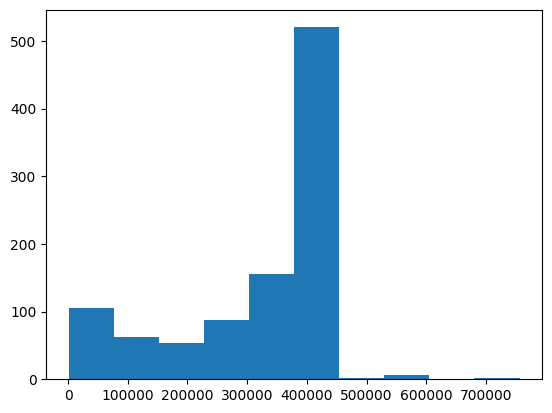

In [11]:
import matplotlib.pyplot as plt

plt.hist(dims_0)

In [6]:
import tensorflow as tf
import numpy as np

def _float_feature_list(values):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=values))


float_values = np.array([1.0, 2.5, 3.8])

# Convert to tf.train.Feature
feature = _float_feature_list(float_values)

print(feature)

float_list {
  value: 1.0
  value: 2.5
  value: 3.799999952316284
}



In [7]:
example = tf.train.Example(features=tf.train.Features(feature={
    "float_values": _float_feature_list([1.0, 2.5, 3.8]),
}))

# Serialize the example
serialized_example = example.SerializeToString()

print(serialized_example)

b'\n"\n \n\x0cfloat_values\x12\x10\x12\x0e\n\x0c\x00\x00\x80?\x00\x00 @33s@'


In [8]:
feature_description = {
    "float_values": tf.io.FixedLenFeature([3], tf.float32),  # Fixed length: 3 floats
}

parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

# Access the parsed data
float_values = parsed_example["float_values"]

float_values

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2.5, 3.8], dtype=float32)>

In [9]:
np.zeros(5)

array([0., 0., 0., 0., 0.])